In [99]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
from ipynb.fs.full.Peaks import slicer
import bisect

In [100]:
SE1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#12 SE1.csv.csv")
SE2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#13 SE2.csv.csv")
SE3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#14 SE3.csv.csv")
SE4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#15 SE4.csv.csv")
SE5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#16 SE5.csv.csv")

In [101]:
#Loading the corresponding force data
force_SE1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#12 SE1.log" , delimiter = "\t")
force_SE2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#13 SE2.log" , delimiter = "\t")
force_SE3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#14 SE3.log" , delimiter = "\t")
force_SE4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#15 SE4.log" , delimiter = "\t")
force_SE5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#16 SE5.log" , delimiter = "\t")

In [102]:
#Visulizing the force data - test #2 - 6 - SE1-5
plt.figure(figsize=(50, 30))

#Time for force


x_force_SE1 = force_SE1["Time"]
x_force_SE2 = force_SE2["Time"]
x_force_SE3 = force_SE3["Time"]
x_force_SE4 = force_SE4["Time"]
x_force_SE5 = force_SE5["Time"]

#force
Load_SE1 = force_SE1["Load"]
Load_SE2 = force_SE2["Load"]
Load_SE3 = force_SE3["Load"]
Load_SE4 = force_SE4["Load"]
Load_SE5 = force_SE5["Load"]

# plt.plot(x_force_SE1,Load_SE1,color = 'green', label = 'force data SE1 test #12' )
# plt.plot(x_force_SE2,Load_SE2,color = 'blue', label = 'force data SE2 test #13' )
# plt.plot(x_force_SE3,Load_SE3,color = 'yellow', label = 'force data SE3 test #14' )
# plt.plot(x_force_SE4,Load_SE4,color = 'red', label = 'force data SE4 test #15' )
# plt.plot(x_force_SE5,Load_SE5,color = 'brown', label = 'force data SE5 test #16' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for SE1


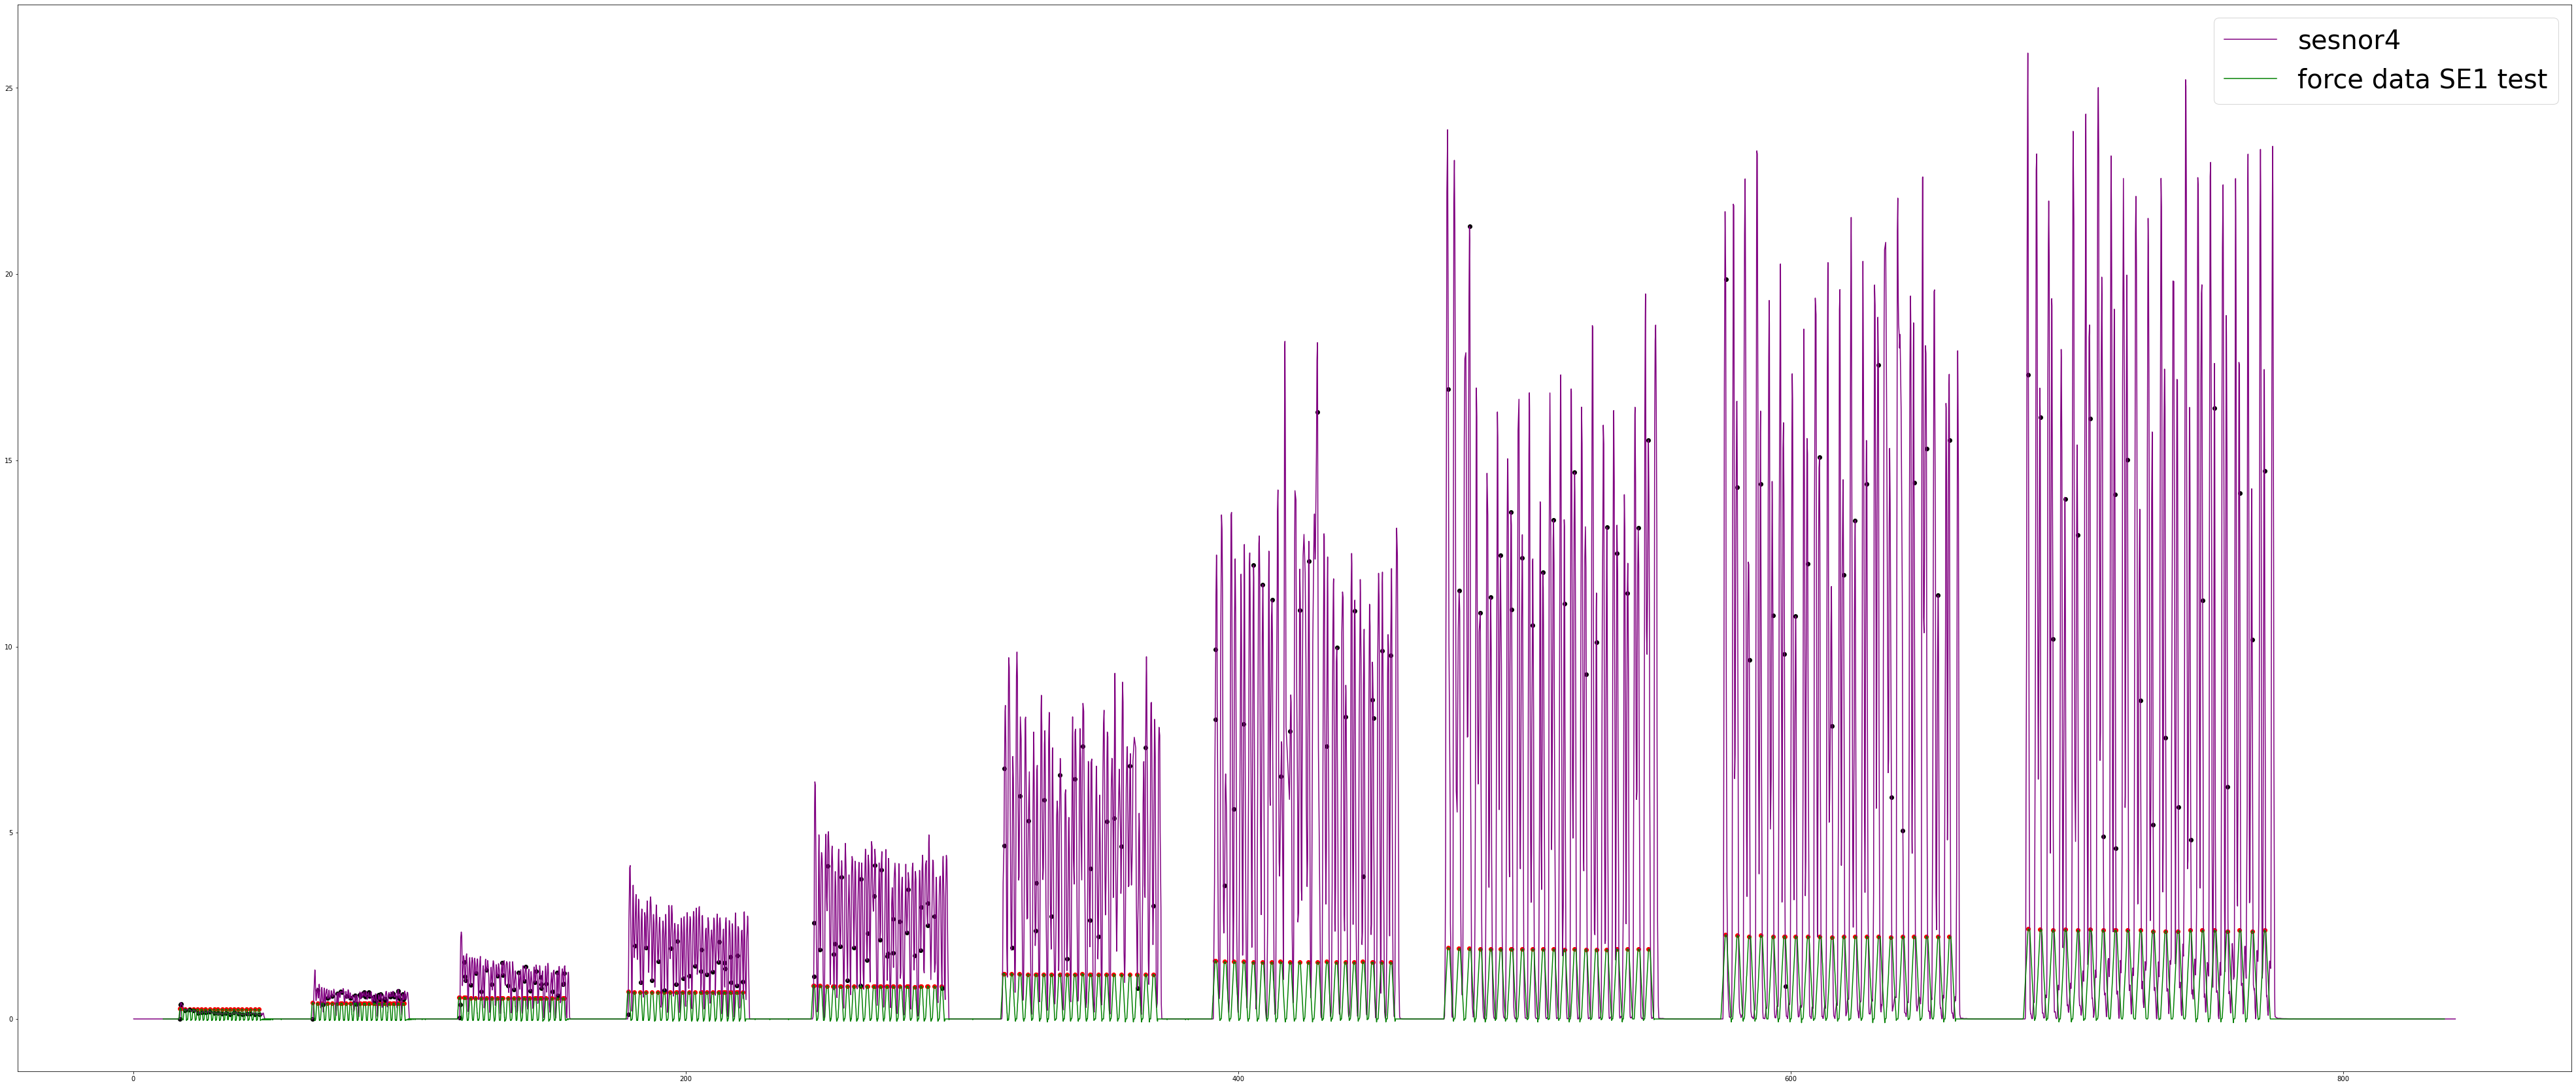

In [103]:
#visualizing and syncing the resistance data for each sensor SE 1- 5 - SE1

plt.figure(figsize=(70, 30))

# plt.plot(SE1["Unnamed: 0"],SE1["s1_d"], color = 'brown', label = 'sesnor1')
# plt.plot(SE1["Unnamed: 0"],SE1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SE1["Unnamed: 0"],SE1["s3_d"], color = 'blue', label = 'sesnor3')
plt.plot(SE1["Unnamed: 0"],SE1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SE1 = x_force_SE1 + 10.8
plt.plot(scaled_x_force_SE1,Load_SE1,color = 'green', label = 'force data SE1 test' )
plt.legend(fontsize=40)
print("Sensor 4 is more profound for SE1")


#finding the peaks
pidx_Load_SE1, _ = find_peaks(Load_SE1,prominence= 0.22 )
peaks_Load_SE1 = Load_SE1[pidx_Load_SE1]
peaks_Ltime_SE1 = scaled_x_force_SE1[pidx_Load_SE1]

plt.scatter(peaks_Ltime_SE1,peaks_Load_SE1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SE1time = []
peaks_Ltime_SE1.reset_index(drop = True, inplace = True)
peaks_Load_SE1.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_SE1)):
    idx_SE1time.append(bisect.bisect_left(SE1["Unnamed: 0"], peaks_Ltime_SE1[i]))

plt.scatter(SE1["Unnamed: 0"][idx_SE1time],SE1["s4_d"][idx_SE1time],color = 'black')
# plt.scatter(SE1["Unnamed: 0"][idx_SE1time],SE1["s3_d"][idx_SE1time],color = 'purple')
# plt.scatter(SE1["Unnamed: 0"][idx_SE1time],SE1["s2_d"][idx_SE1time],color = 'yellow')
# plt.scatter(SE1["Unnamed: 0"][idx_SE1time],SE1["s1_d"][idx_SE1time],color = 'pink')

In [44]:
#Input = 4 sensors' peaks (4 by 1) / output = location + load peak / No.samples = 73 (number of locations) * amount of peaks
#each peak is one sample of dimension.

# df[df.index.duplicated()]
# peaks_Load_SE1.reset_index(drop = True, inplace = True)
# peaks_Load_SE1 = peaks_Load_SE1[peaks_Load_SE1.index.duplicated()]
# print(SE1["s1_d"][idx_SE1time])
# peaks_Load_SE1.index.is_uniqu
# peaks_Load_SE1.index = new_index
# peaks_Load_SE1
# SE1["s1_d"][idx_SE1time]

135     0.001617
138     0.002757
140     0.001980
147     0.001071
158     0.000792
          ...   
5744    0.373941
5783    0.168577
5818    0.295120
5855    0.243911
5893    0.323043
Name: s1_d, Length: 269, dtype: float64

In [104]:
#directory - 
#C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data

# path = r"my/path/to/file.txt"
# assert os.path.isfile(path)
# with open(path, "r") as f:
#     pass
Load_SE1peaks =[]
for i in range(len(peaks_Load_SE1)):
    Load_SE1peaks.append(peaks_Load_SE1[i])
    
content_SE1 = {'R1':SE1["s1_d"][idx_SE1time],
              'R2':SE1["s2_d"][idx_SE1time],
              'R3':SE1["s3_d"][idx_SE1time],
              'R4':SE1["s4_d"][idx_SE1time], 
              'Load': Load_SE1peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_SE1 = pd.DataFrame(content_SE1, columns = ['R1','R2','R3','R4','Load'])

# load_SE1= pd.DataFrame(load_SE1, columns = ['Load'])
df_SE1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SE1.csv',index = False, header = True)



Sensor 4 is more profound for SE2


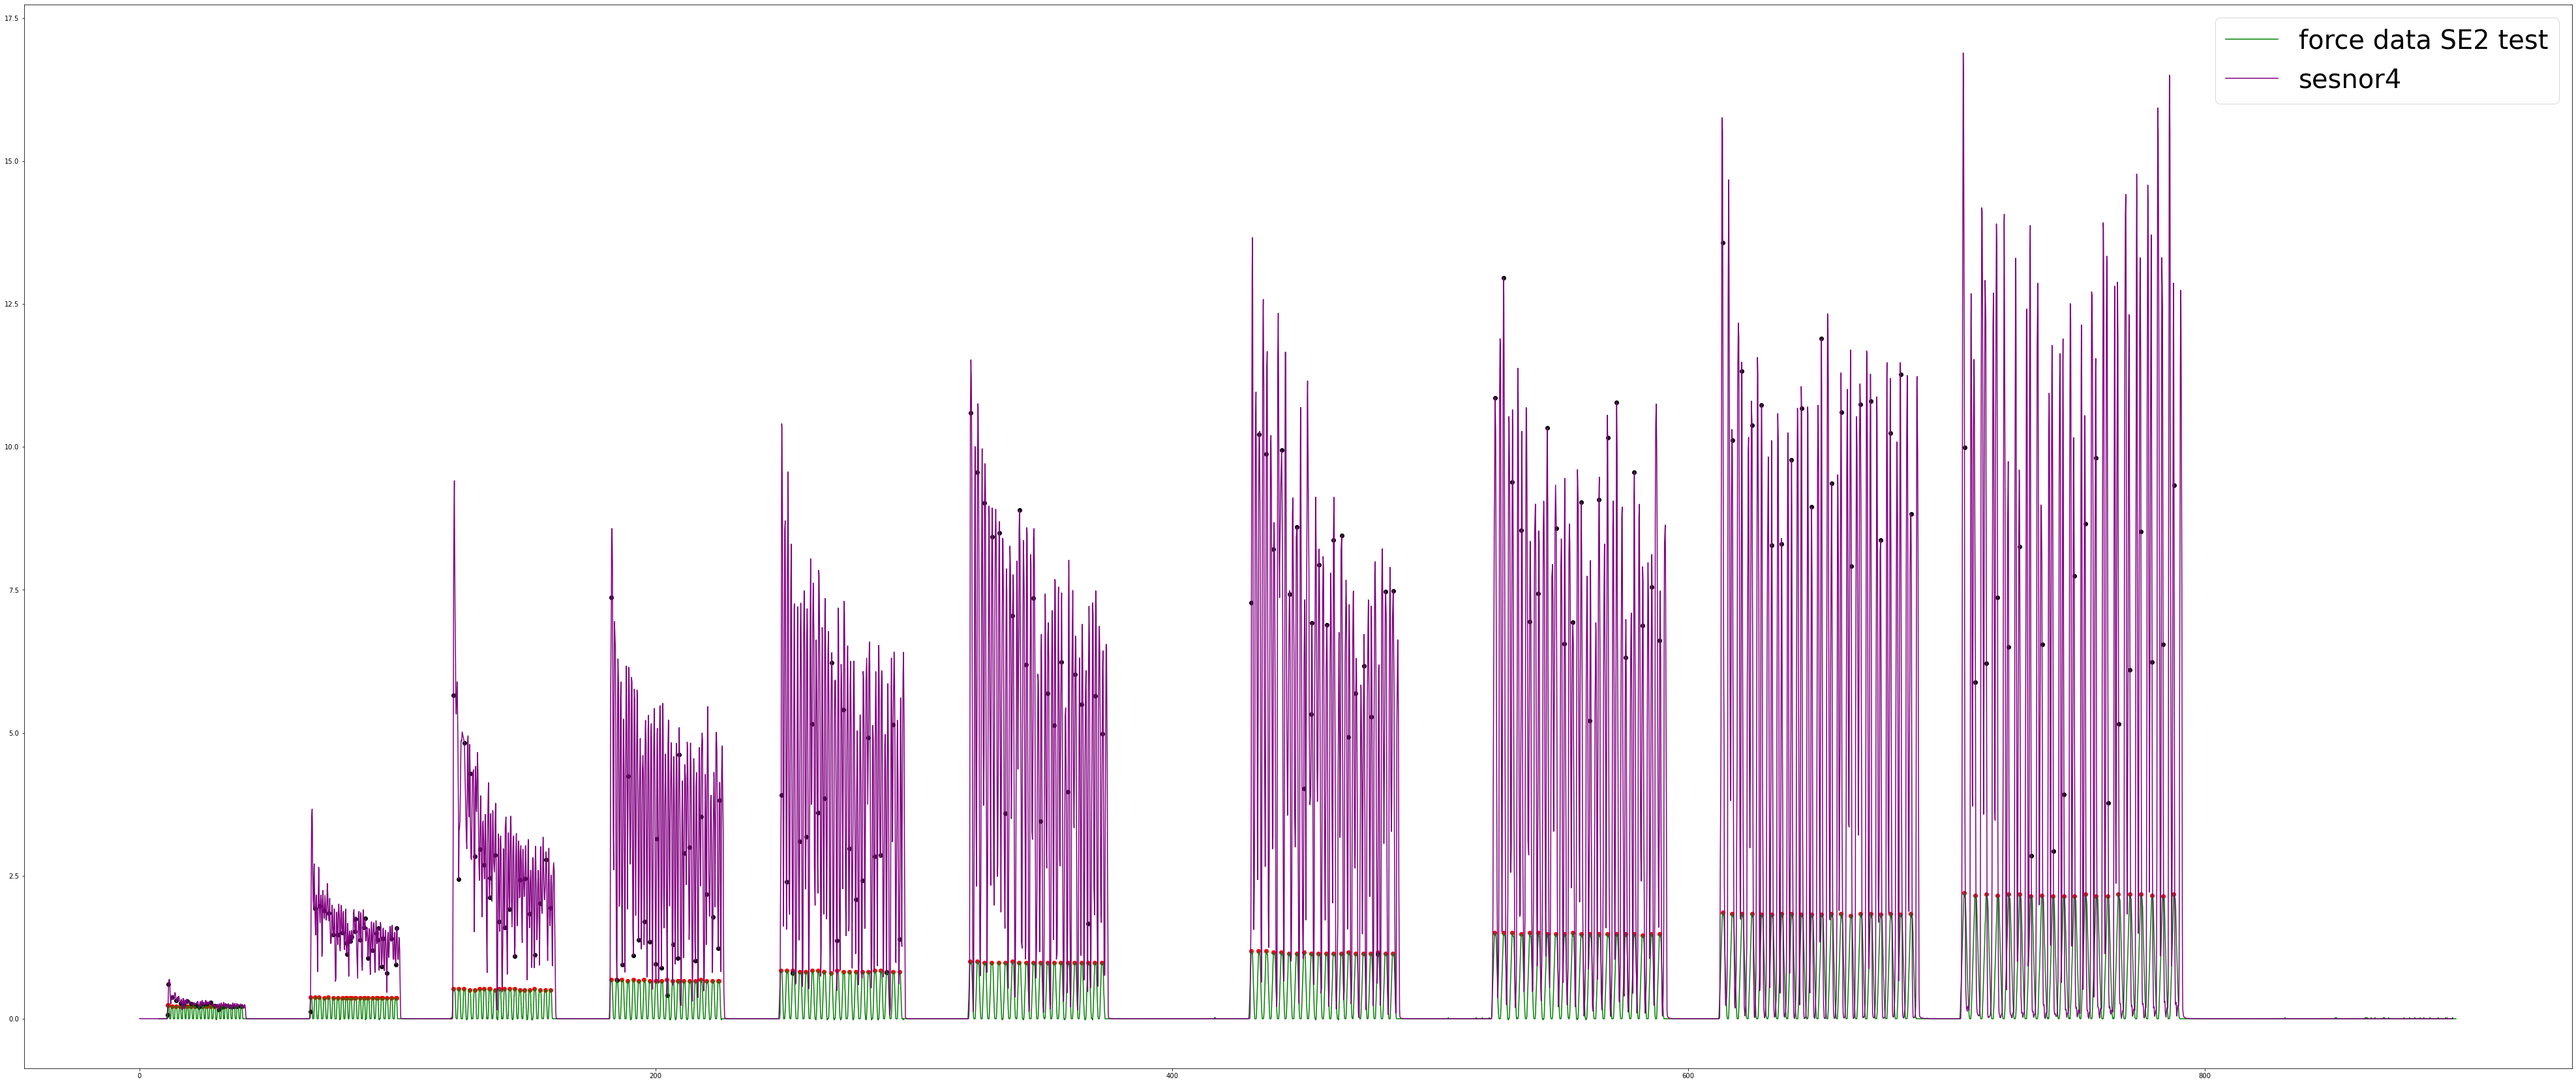

In [105]:
### visualizing and syncing the resistance data for each sensor SE 1- 5 - SE2

plt.figure(figsize=(70, 30))

# plt.plot(SE2["Unnamed: 0"],SE2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SE2["Unnamed: 0"],SE2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SE2["Unnamed: 0"],SE2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SE2["Unnamed: 0"],SE2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SE2 = x_force_SE2 + 7.5
scaled_SE2 = SE2["Unnamed: 0"]

plt.plot(scaled_x_force_SE2,Load_SE2,color = 'green', label = 'force data SE2 test' )
plt.plot(scaled_SE2,SE2["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)

print("Sensor 4 is more profound for SE2")

#finding the peaks
pidx_Load_SE2, _ = find_peaks(Load_SE2,prominence= 0.22 )
peaks_Load_SE2 = Load_SE2[pidx_Load_SE2]
peaks_Ltime_SE2 = scaled_x_force_SE2[pidx_Load_SE2]

plt.scatter(peaks_Ltime_SE2,peaks_Load_SE2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SE2time = []
peaks_Ltime_SE2.reset_index(drop = True, inplace = True)
peaks_Load_SE2.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_SE2)):
    idx_SE2time.append(bisect.bisect_left(SE2["Unnamed: 0"], peaks_Ltime_SE2[i]))

plt.scatter(SE2["Unnamed: 0"][idx_SE2time],SE2["s4_d"][idx_SE2time],color = 'black')

In [64]:
print(peaks_Load_SE2)

0      0.24
1      0.24
2      0.22
3      0.22
4      0.22
       ... 
211    2.18
212    2.18
213    2.16
214    2.14
215    2.18
Name: Load, Length: 216, dtype: float64


In [106]:
#Storing the peaks into csv file - SE2
Load_SE2peaks =[]

for i in range(len(peaks_Load_SE2)):
    Load_SE2peaks.append(peaks_Load_SE2[i])
    
content_SE2 = {'R1':SE2["s1_d"][idx_SE2time],
              'R2':SE2["s2_d"][idx_SE2time],
              'R3':SE2["s3_d"][idx_SE2time],
              'R4':SE2["s4_d"][idx_SE2time], 
              'Load': Load_SE2peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_SE2 = pd.DataFrame(content_SE2, columns = ['R1','R2','R3','R4','Load'])

df_SE2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SE2.csv',index = False, header = True)

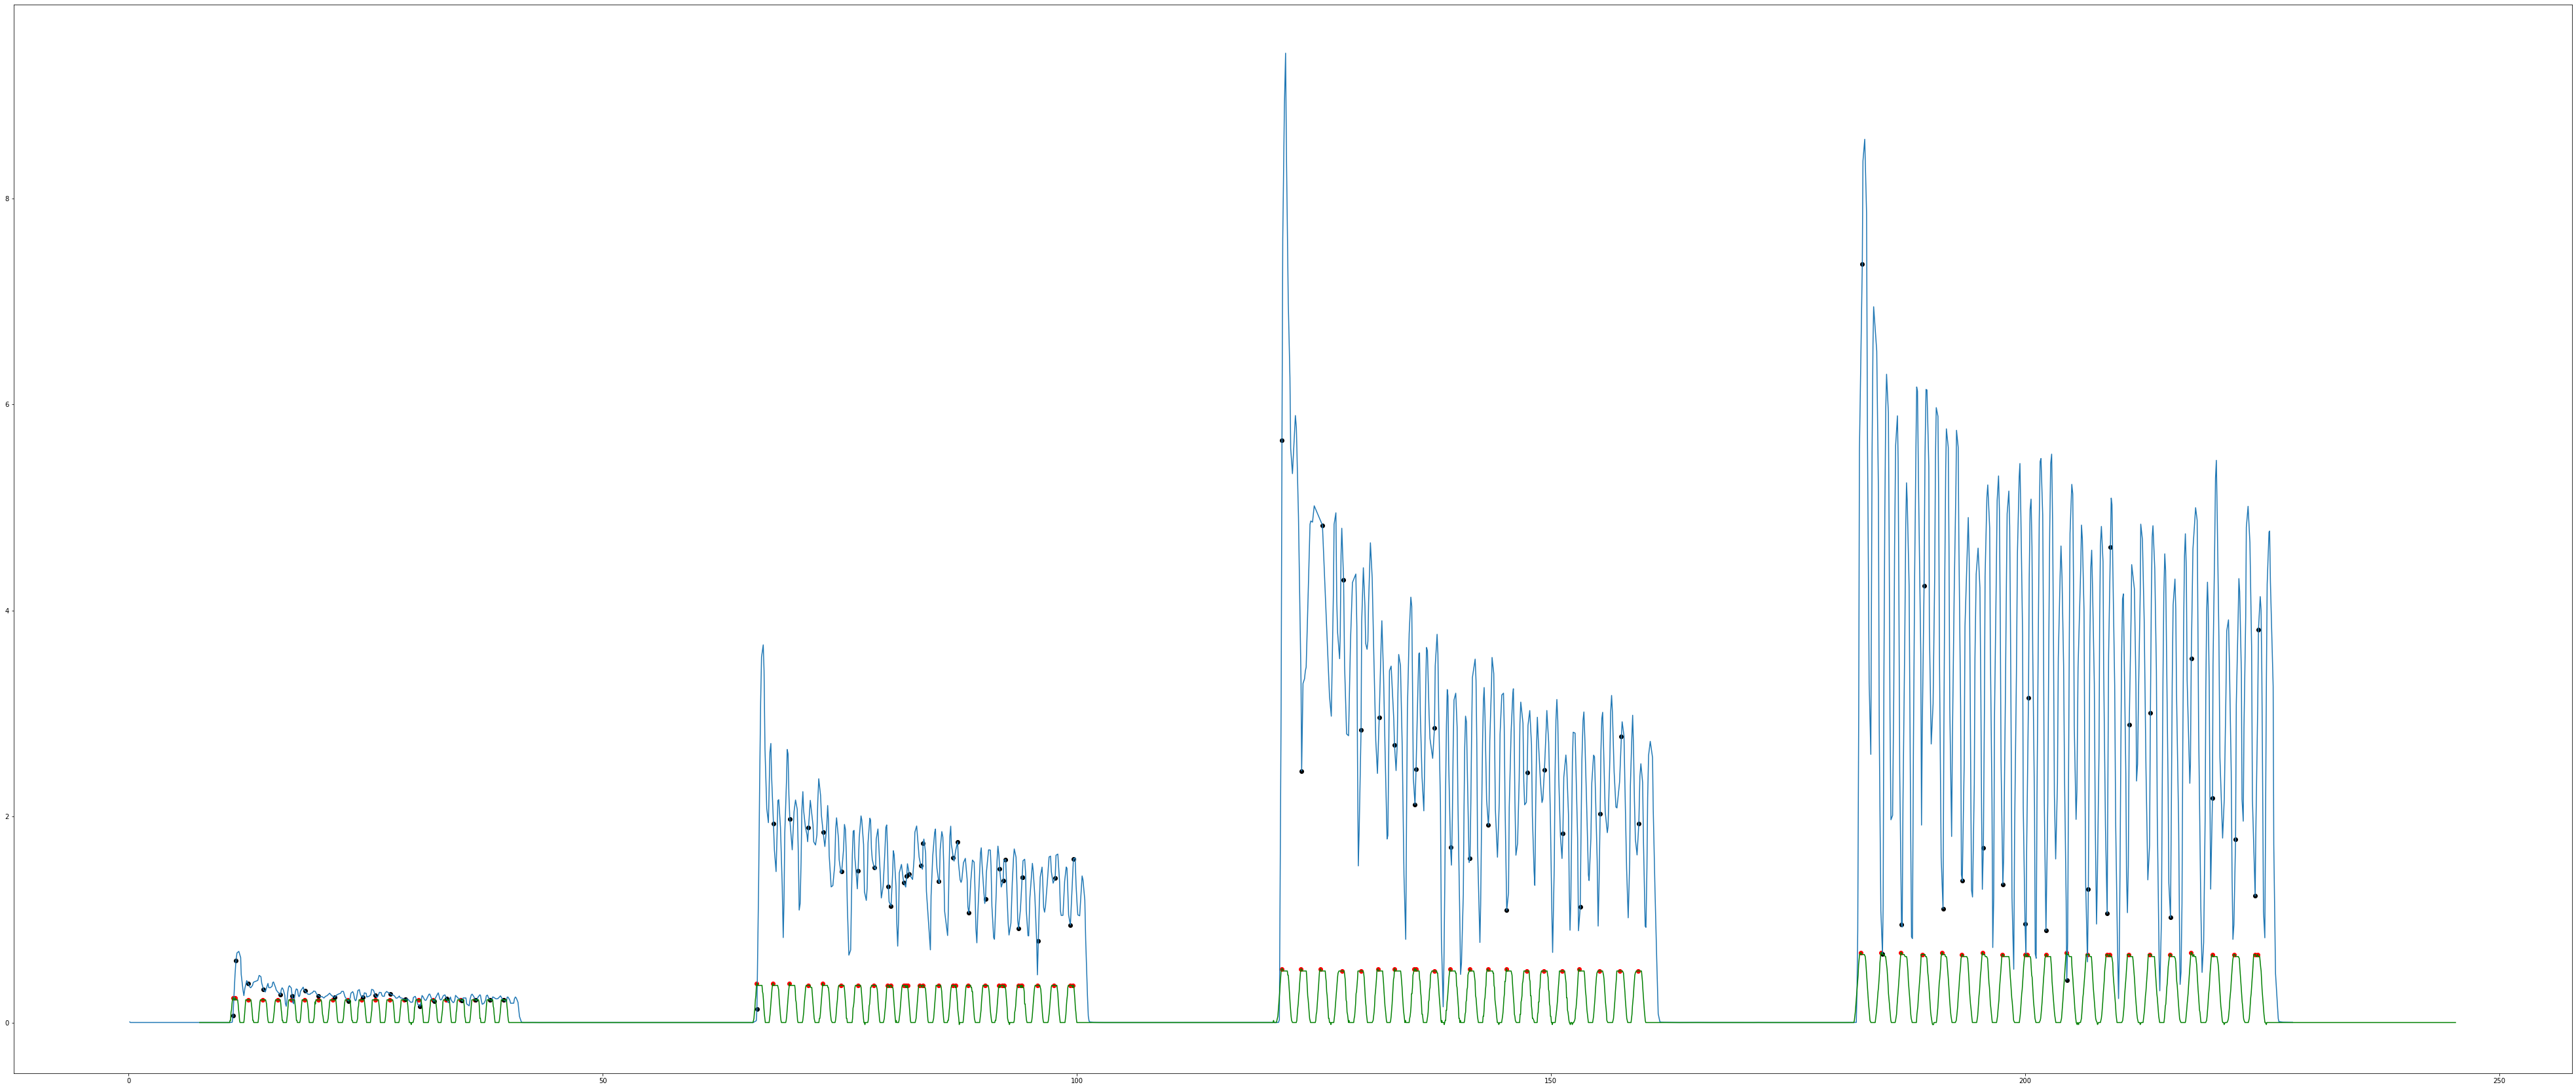

In [107]:
plt.figure(figsize=(70, 30))
SE2_time = SE2["Unnamed: 0"].iloc[0:1800]
SE2_res = SE2["s4_d"].iloc[0:1800]
Load_time = scaled_x_force_SE2.iloc[0:4000]
Load_slice = Load_SE2.iloc[0:4000]
plt.plot(SE2_time,SE2_res)
plt.plot(Load_time,Load_slice,color = 'green')
peaks_s1, _ = find_peaks(Load_slice,prominence= 0.22 )
peaks_load = Load_slice[peaks_s1]
peaksL_time = Load_time[peaks_s1]
plt.scatter(peaksL_time,peaks_load,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SEtime = []
peaksL_time.reset_index(drop = True, inplace = True)
for i in range(len(peaksL_time)):
    idx_SEtime.append(bisect.bisect_right(SE2_time, peaksL_time[i]))

plt.scatter(SE2_time[idx_SEtime],SE2_res[idx_SEtime],color = 'black')


# A loop to store: the time and peaks of load (csv 1) & the time and peak for sensor (csv 2)
# for i in range(len(peaksL_time)):
#     store(SE2_res[idx_SEtime[i]],SE2_time[idx_SEtime[i]]) #csv1
#     store(peaksL_time[i],peaks_load) #csv2

In [44]:
type(peaksL_time)

pandas.core.series.Series

In [36]:
# SE2_time[j] - peaksL_time[i])
print(peaksL_time)

69       11.500
74       11.750
100      13.101
131      14.650
163      16.251
         ...   
3627    218.001
3657    220.250
3688    222.550
3717    224.750
3721    225.051
Name: Time, Length: 95, dtype: float64


Sensor 4 is more profound for SE3


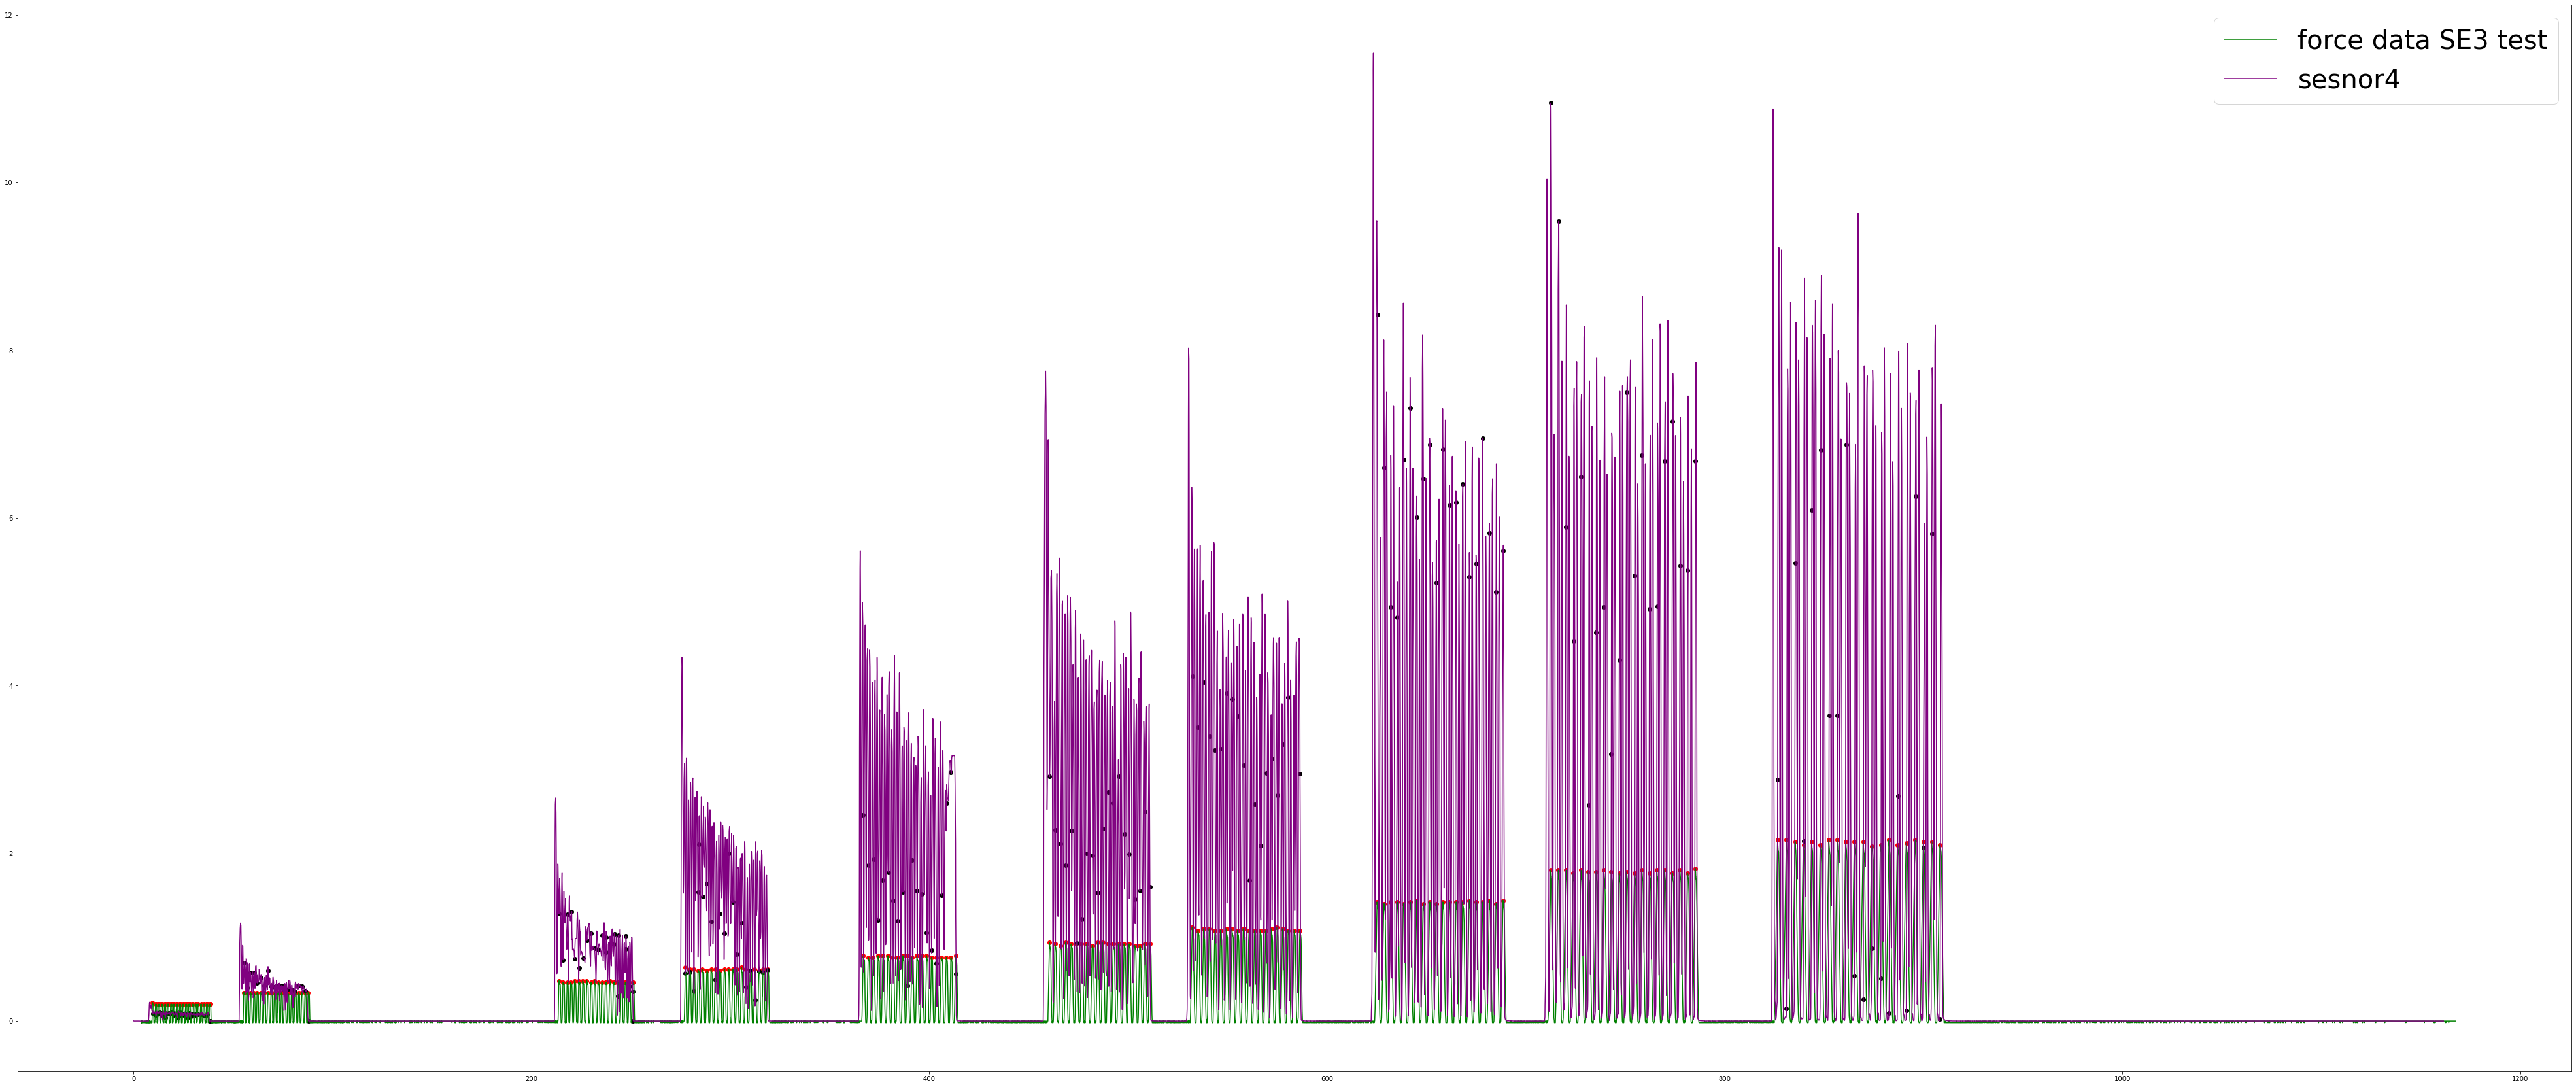

In [108]:
#visualizing and syncing the resistance data for each sensor SE 1- 5 - SE3

plt.figure(figsize=(70, 30))

# plt.plot(SE3["Unnamed: 0"],SE3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SE3["Unnamed: 0"],SE3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SE3["Unnamed: 0"],SE3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SE3["Unnamed: 0"],SE3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SE3 = x_force_SE3 + 3.85
scaled_SE3 = SE3["Unnamed: 0"]

plt.plot(scaled_x_force_SE3,Load_SE3,color = 'green', label = 'force data SE3 test' )
plt.plot(scaled_SE3,SE3["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SE3")

#finding the peaks
pidx_Load_SE3, _ = find_peaks(Load_SE3,prominence= 0.22 )
peaks_Load_SE3 = Load_SE3[pidx_Load_SE3]
peaks_Ltime_SE3 = scaled_x_force_SE3[pidx_Load_SE3]

plt.scatter(peaks_Ltime_SE3,peaks_Load_SE3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SE3time = []
peaks_Ltime_SE3.reset_index(drop = True, inplace = True)
peaks_Load_SE3.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SE3)):
    idx_SE3time.append(bisect.bisect_left(SE3["Unnamed: 0"], peaks_Ltime_SE3[i]))

plt.scatter(SE3["Unnamed: 0"][idx_SE3time],SE3["s4_d"][idx_SE3time],color = 'black')

In [109]:
#Storing the peaks into csv file - SE3
Load_SE3peaks =[]

for i in range(len(peaks_Load_SE3)):
    Load_SE3peaks.append(peaks_Load_SE3[i])
    
content_SE3 = {'R1':SE3["s1_d"][idx_SE3time],
              'R2':SE3["s2_d"][idx_SE3time],
              'R3':SE3["s3_d"][idx_SE3time],
              'R4':SE3["s4_d"][idx_SE3time], 
              'Load': Load_SE3peaks} 


df_SE3 = pd.DataFrame(content_SE3, columns = ['R1','R2','R3','R4','Load'])

df_SE3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SE3.csv',index = False, header = True)

Sensor 4 is more profound for SE1


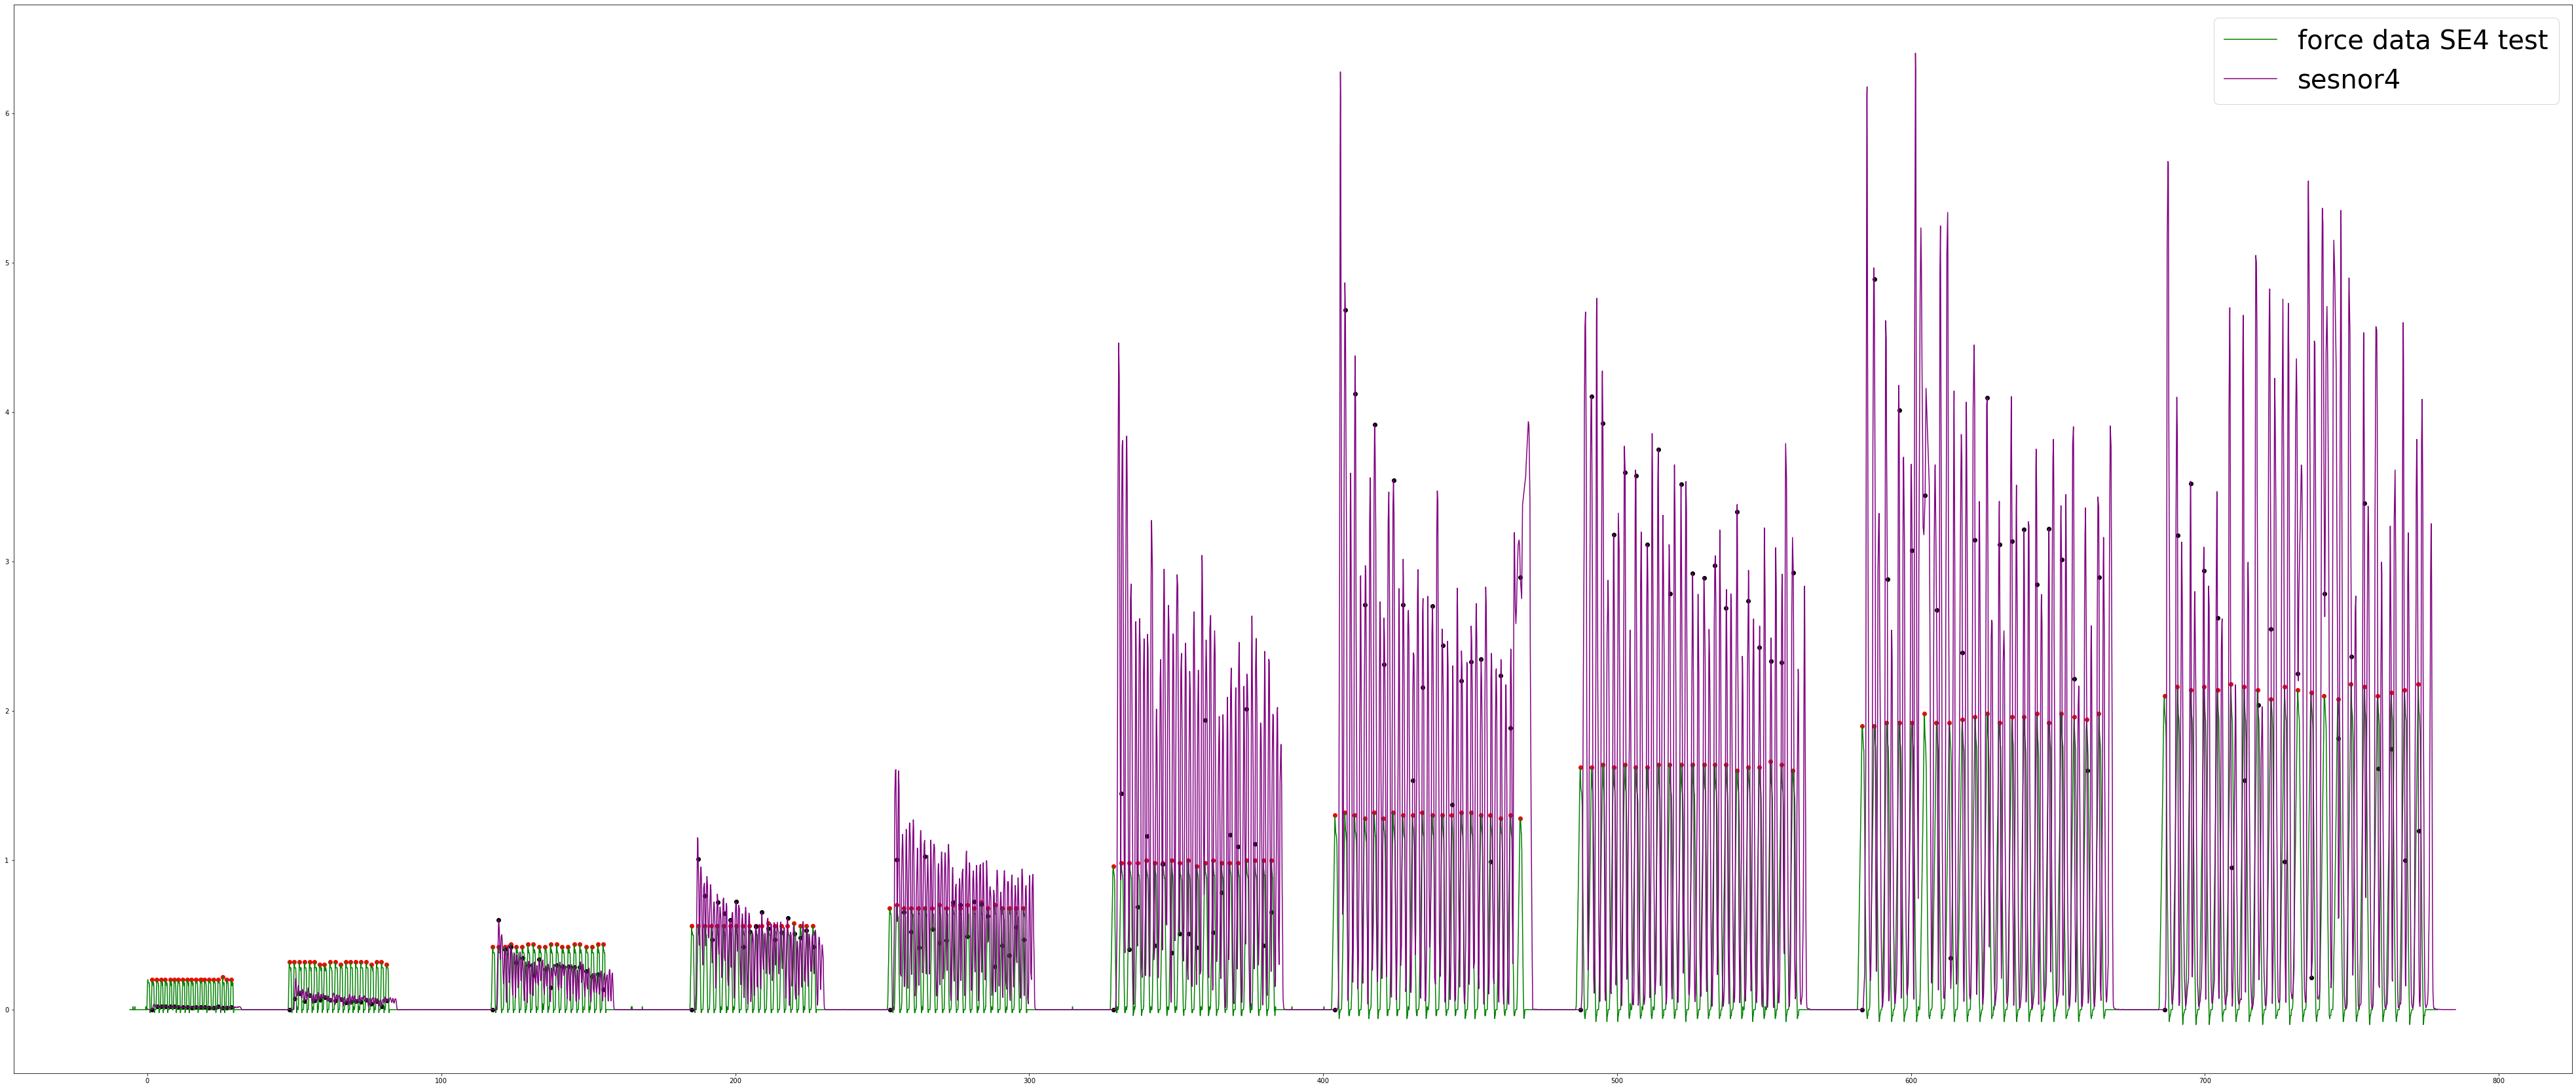

In [110]:
#visualizing and syncing the resistance data for each sensor SE 1- 5 - SE4

plt.figure(figsize=(70, 30))

# plt.plot(SE4["Unnamed: 0"],SE4["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SE4["Unnamed: 0"],SE4["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SE4["Unnamed: 0"],SE4["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SE4["Unnamed: 0"],SE4["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SE4 = x_force_SE4 - 6
scaled_SE4 = SE4["Unnamed: 0"]

plt.plot(scaled_x_force_SE4,Load_SE4,color = 'green', label = 'force data SE4 test' )
plt.plot(scaled_SE4,SE4["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SE1")

#finding the peaks
pidx_Load_SE4, _ = find_peaks(Load_SE4,prominence= 0.22 )
peaks_Load_SE4 = Load_SE4[pidx_Load_SE4]
peaks_Ltime_SE4 = scaled_x_force_SE4[pidx_Load_SE4]

plt.scatter(peaks_Ltime_SE4,peaks_Load_SE4,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SE4time = []
peaks_Ltime_SE4.reset_index(drop = True, inplace = True)
peaks_Load_SE4.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SE4)):
    idx_SE4time.append(bisect.bisect_left(SE4["Unnamed: 0"], peaks_Ltime_SE4[i]))

plt.scatter(SE4["Unnamed: 0"][idx_SE4time],SE4["s4_d"][idx_SE4time],color = 'black')

In [111]:
#Storing the peaks into csv file - SE4
Load_SE4peaks =[]

for i in range(len(peaks_Load_SE4)):
    Load_SE4peaks.append(peaks_Load_SE4[i])
    
content_SE4 = {'R1':SE4["s1_d"][idx_SE4time],
              'R2':SE4["s2_d"][idx_SE4time],
              'R3':SE4["s3_d"][idx_SE4time],
              'R4':SE4["s4_d"][idx_SE4time], 
              'Load': Load_SE4peaks} 


df_SE4 = pd.DataFrame(content_SE4, columns = ['R1','R2','R3','R4','Load'])

df_SE4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SE4.csv',index = False, header = True)

Sensor 4 is more profound for SE5


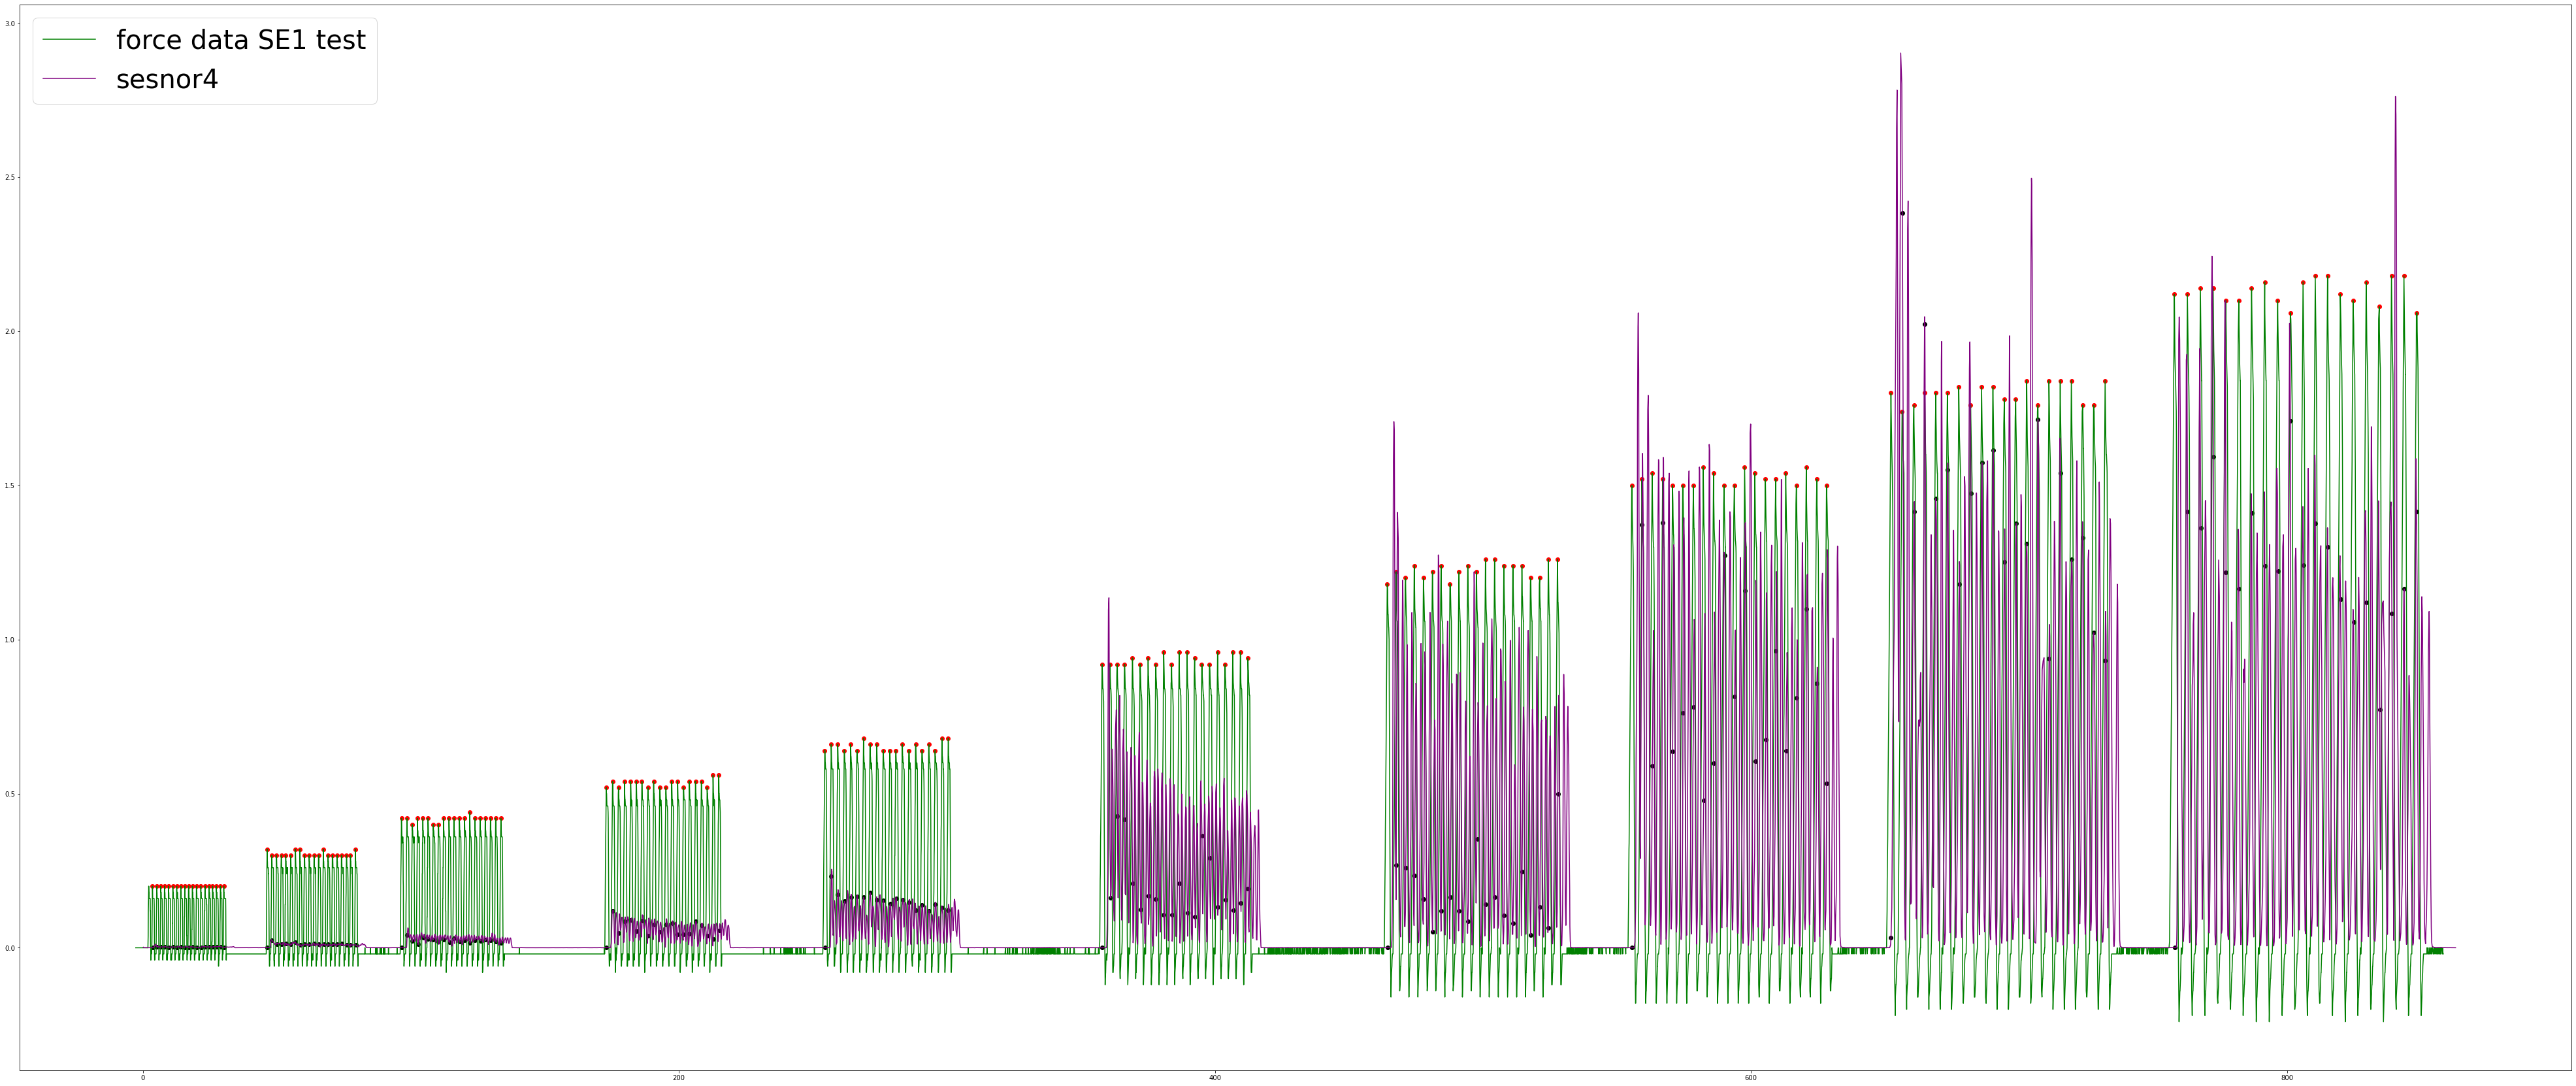

In [112]:
#visualizing and syncing the resistance data for each sensor SE 1- 5 - SE5

plt.figure(figsize=(70, 30))

# plt.plot(SE5["Unnamed: 0"],SE5["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SE5["Unnamed: 0"],SE5["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SE5["Unnamed: 0"],SE5["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SE5["Unnamed: 0"],SE5["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SE5 = x_force_SE5 - 2.7
scaled_SE5 = SE5["Unnamed: 0"]

plt.plot(scaled_x_force_SE5,Load_SE5,color = 'green', label = 'force data SE1 test' )
plt.plot(scaled_SE5,SE5["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SE5")

#finding the peaks
pidx_Load_SE5, _ = find_peaks(Load_SE5,prominence= 0.22 )
peaks_Load_SE5 = Load_SE5[pidx_Load_SE5]
peaks_Ltime_SE5 = scaled_x_force_SE5[pidx_Load_SE5]

plt.scatter(peaks_Ltime_SE5,peaks_Load_SE5,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SE5time = []
peaks_Ltime_SE5.reset_index(drop = True, inplace = True)
peaks_Load_SE5.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SE5)):
    idx_SE5time.append(bisect.bisect_left(SE5["Unnamed: 0"], peaks_Ltime_SE5[i]))

plt.scatter(SE5["Unnamed: 0"][idx_SE5time],SE5["s4_d"][idx_SE5time],color = 'black')

In [113]:
#Storing the peaks into csv file - SE5
Load_SE5peaks =[]

for i in range(len(peaks_Load_SE5)):
    Load_SE5peaks.append(peaks_Load_SE5[i])
    
content_SE5 = {'R1':SE5["s1_d"][idx_SE5time],
              'R2':SE5["s2_d"][idx_SE5time],
              'R3':SE5["s3_d"][idx_SE5time],
              'R4':SE5["s4_d"][idx_SE5time], 
              'Load': Load_SE5peaks} 


df_SE5 = pd.DataFrame(content_SE5, columns = ['R1','R2','R3','R4','Load'])

df_SE5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SE5.csv',index = False, header = True)